# Import Data

In [ ]:
# Load testing dataframe
# file = '1W0ytmDTBmJFWhZpTBCxbGFlkN5HPBlQx'
# url = f'https://drive.google.com/uc?id={file}'

from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Exercise Chapter 2 Topic 2_ Dataset.csv']))

NameError: ignored

In [ ]:
df.head()

NameError: ignored

##Coba upload lewat gdrive lebih cepet gausah nunggu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Collab Dataset/Exercise Chapter 2 Topic 2: Dataset.csv')

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


# Sampling

In [ ]:
# n = N/1+Ne^2
N = df.shape[0] # numebr of rows
e = 0.05
n = N/(1+(N*(e**2)))
print(f'Number of population is {N}')
print(f'With margin {e*100}% we got samples of {round(n,0)}')

Number of population is 294478
With margin 5.0% we got samples of 399.0


In [ ]:
# Take 399 samples

df_sample = df.sample(399, random_state = 42)

In [ ]:
df_sample.shape

(399, 5)

In [ ]:
df_sample2 = df.sample(frac=0.01, random_state = 42)
df_sample2

,user_id,timestamp,group,landing_page,converted
99394,766329,2017-01-21 18:17:42.748186,control,old_page,0
274835,767612,2017-01-21 01:34:17.756049,treatment,new_page,0
123827,685539,2017-01-17 22:29:59.771772,treatment,new_page,0
272314,765889,2017-01-23 16:05:13.197496,treatment,new_page,0
103082,633224,2017-01-19 11:26:59.482240,treatment,new_page,0
...,...,...,...,...,...
112984,765567,2017-01-20 04:40:24.460571,treatment,new_page,0
260293,803186,2017-01-24 04:47:26.987534,control,old_page,0
239160,889202,2017-01-20 23:41:04.915276,control,old_page,0
280440,828429,2017-01-13 11:37:38.274806,treatment,new_page,0


###Stratified Random Sampling (Kak Cindy)

In [ ]:
from pandas.core.common import random_state

In [ ]:
df_stratified = df.groupby('group').apply(lambda x:x.sample(n=200, random_state = 42))
df_stratified

user_id                   timestamp      group landing_page  \
group                                                                           
control   236870   631010  2017-01-18 04:44:18.590293    control     old_page   
          231146   736681  2017-01-14 05:22:43.771772    control     old_page   
          74363    916949  2017-01-23 08:52:53.050325    control     old_page   
          193397   634217  2017-01-07 23:27:09.109877    control     old_page   
          254285   932468  2017-01-20 14:26:10.133979    control     old_page   
...                   ...                         ...        ...          ...   
treatment 106976   749041  2017-01-07 10:38:10.660030  treatment     new_page   
          214010   769091  2017-01-22 02:08:54.384885  treatment     new_page   
          29293    675465  2017-01-13 20:59:59.196779  treatment     new_page   
          261475   835733  2017-01-05 17:21:15.411489  treatment     new_page   
          269226   847105  2017-01-02 15:58:30.549639  treatment     new_page   

                  converted  
group                        
control   236870          0  
          231146          0  
          74363           0  
          193397          0  
          254285          0  
...                     ...  
treatment 106976          0  
          214010          0  
          29293           0  
          261475          0  
          269226          0  

[400 rows x 5 columns]

###Experimental Design (Kak Cindy)

In [ ]:
# define treatment and control

control = df_stratified[df_stratified.group == 'control']
treatment = df_stratified[df_stratified['group'] == 'treatment']
print(control.shape[0], treatment.shape[0])

200 200


In [ ]:
# hitung conversion

conv_ctrl = control.converted.sum()
conv_trt = treatment['converted'].sum()
print(conv_ctrl, conv_trt)

26 19


In [ ]:
# conversion rate

conv_rate_ctrl = conv_ctrl/control.shape[0]
conv_rate_trt = conv_trt/treatment.shape[0]
print('Conversion Rate Control: {0:0.2f}%'.format(conv_rate_ctrl*100))
print('Conversion Rate Treatment: {0:0.2f}%'.format(conv_rate_trt*100))

Conversion Rate Control: 13.00%
Conversion Rate Treatment: 9.50%


In [ ]:
dir(plt)

In [ ]:
import matplotlib.pyplot as plt

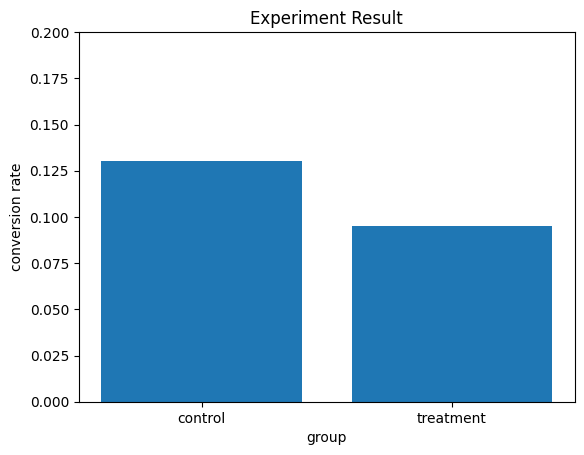

In [ ]:
# data visualization

x = ['control', 'treatment']
y = [conv_rate_ctrl, conv_rate_trt]

# creat pltplot

plt.bar(x, y)
plt.xlabel('group')
plt.ylabel('conversion rate')
plt.ylim(0.0, 0.2)
plt.title("Experiment Result")
plt.show()

In [ ]:
##Statistical Test for Conversion Rate

In [ ]:
import numpy as np
import statsmodels.stats.proportion as sp

In [ ]:
success = np.array([conv_ctrl, conv_trt])
obs = np.array([control.shape[0], treatment.shape[0]])
print(success, obs)

[26 19] [200 200]


In [ ]:
zstat, p_val = sp.proportions_ztest(success, obs)
print(zstat, p_val)

1.1076628809809297 0.2680074357466319


* If p_val > significance level = Reject (Tolak H0)
* If p_val < significance level = Fail to reject H0

H0 : proporsi sama (P1 = P2)
H1 : proporsi berbeda (P1 != P2)
Significance level : 5% (0.05)

In [ ]:
print('P-value: {0:0.4f}'.format(p_val))
if p_val < 0.05:
  print('Reject H0, conversion rate between old page and new page is different')
else:
  print('Failed to reject H0, conversion rate between old page and new page is no different') 

P-value: 0.2680
Failed to reject H0, conversion rate between old page and new page is no different


##Regression with Kak Cindy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

##SIMPLE LINEAR REGRESSION

In [ ]:
# select x dan y

x = df.sepal_length
y = df['petal_length']

In [ ]:
color = df.species

<Axes: xlabel='sepal_length', ylabel='petal_length'>

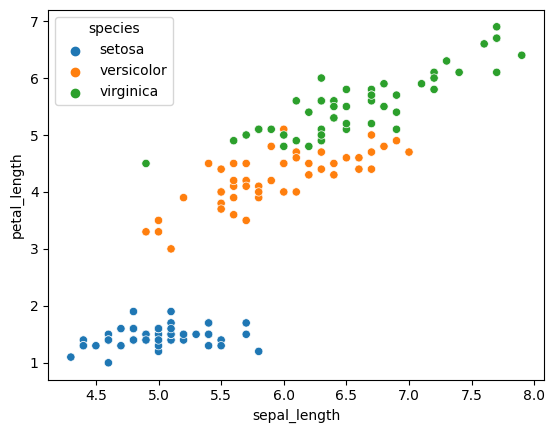

In [ ]:
# EDA scatterplot

sns.scatterplot(x=x, y=y, hue = color)

## Slovin

In [ ]:
df.shape

(294478, 5)

In [ ]:
df.shape[0] #number of rows

294478

In [ ]:
# Slovin Method
N = df.shape[0]
e = 0.05 #5% margin of error

slovin_sample = N/(1+N * e**2)

In [ ]:
slovin_sample

399.45740272248173

## Based on Size

In [ ]:
df_sample_400 = df.sample(n=400) # secara acak dengan ketentuan yg kita tentukan sendiri ex = 4000

In [ ]:
df_sample_400['group'].value_counts()

control      205
treatment    195
Name: group, dtype: int64

In [ ]:
df_sample_400.head()

,user_id,timestamp,group,landing_page,converted
239136,905729,2017-01-07 08:42:29.823207,control,old_page,0
144100,701566,2017-01-21 19:13:54.761795,treatment,new_page,0
23500,816367,2017-01-24 03:18:25.455654,control,old_page,0
190841,645087,2017-01-03 09:36:26.820511,control,old_page,0
62394,754367,2017-01-10 15:33:00.101136,control,old_page,0


## Fraction

In [ ]:
df.sample(frac=0.25)

,user_id,timestamp,group,landing_page,converted
202699,754436,2017-01-19 03:49:58.838122,treatment,new_page,0
75938,937862,2017-01-08 14:45:39.459394,treatment,new_page,0
22912,721709,2017-01-06 14:31:32.446103,treatment,new_page,0
167367,876850,2017-01-05 08:59:59.859823,treatment,new_page,0
126342,868491,2017-01-06 17:37:29.961782,control,old_page,1
...,...,...,...,...,...
68980,853339,2017-01-13 07:47:20.176453,treatment,new_page,0
97017,696590,2017-01-05 15:30:33.406978,control,old_page,0
197694,842841,2017-01-05 04:03:27.203128,treatment,new_page,0
209295,640449,2017-01-18 00:40:26.433724,treatment,new_page,0


## Stratified Sampling

In [ ]:
df_sample_stratified = df.groupby(['group']).apply(lambda x: x.sample(n=200,random_state=0))
df_sample_stratified

user_id                   timestamp      group landing_page  \
group                                                                           
control   85874    779213  2017-01-19 17:35:51.276797    control     old_page   
          222214   724864  2017-01-22 19:38:24.762239    control     old_page   
          286529   680844  2017-01-09 22:43:09.877948    control     old_page   
          270276   803748  2017-01-14 23:26:55.247755    control     old_page   
          131387   811343  2017-01-21 20:02:28.359658    control     old_page   
...                   ...                         ...        ...          ...   
treatment 148595   802048  2017-01-11 00:01:01.228466  treatment     new_page   
          293006   673585  2017-01-03 20:57:58.456966  treatment     new_page   
          74521    831518  2017-01-14 07:29:09.719221  treatment     new_page   
          168196   835709  2017-01-23 01:44:33.935291  treatment     new_page   
          113653   711205  2017-01-02 20:23:59.102799  treatment     new_page   

                  converted  
group                        
control   85874           0  
          222214          0  
          286529          0  
          270276          0  
          131387          0  
...                     ...  
treatment 148595          0  
          293006          0  
          74521           0  
          168196          0  
          113653          0  

[400 rows x 5 columns]

In [ ]:
df_sample_stratified['group'].value_counts()

control      200
treatment    200
Name: group, dtype: int64

# Experiment

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df.shape

(294478, 5)

## Memisahkan control dan treatment

In [ ]:
control = df[df['group']=='control']
treatment = df[df['group']=='treatment']

In [ ]:
control.shape

(147202, 5)

In [ ]:
treatment.shape

(147276, 5)

## Kalkulasi conversion

In [ ]:
# Hitung jumlah konversi
n_success_control = control['converted'].sum()
n_success_treatment = treatment['converted'].sum()

# Menghitung semua sample pada control dan treatment
n_obs_control = control['converted'].count()
n_obs_treatment = treatment['converted'].count()

In [ ]:
print(n_obs_control, n_success_control, n_obs_treatment, n_success_treatment)

147202 17723 147276 17514


## Hitung Conversion Rate

In [ ]:
control_conversion_rate = n_success_control/n_obs_control
treatment_conversion_rate = n_success_treatment/n_obs_treatment

In [ ]:
print('Conversion Rate Control : {0:0.4f}%'.format(control_conversion_rate*100))
print('Conversion Rate Treatment : {0:0.4f}%'.format(treatment_conversion_rate*100))

Conversion Rate Control : 12.0399%
Conversion Rate Treatment : 11.8920%


In [ ]:
import matplotlib.pyplot as plt

(0.118, 0.1205)

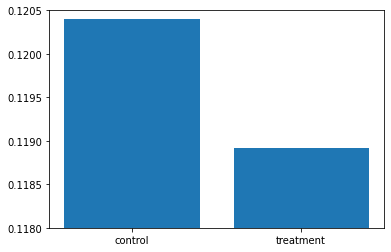

In [ ]:
x = ['control','treatment']
value = [control_conversion_rate,treatment_conversion_rate]
plt.bar(x,value)

plt.ylim(0.118,0.1205)

## Statistical Test

In [ ]:
import numpy as np
import statsmodels.stats.proportion as sp

In [ ]:
# Mengubah menjadi array
success = np.array([n_success_control,n_success_treatment])
obs = np.array([n_obs_control,n_obs_treatment])

NameError: ignored

In [ ]:
stats, pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-Value : {0:0.4f}'.format(pvalue))
if pvalue >= 0.05:
    print('Failed to reject H0')
else :
    print('Reject H0')

P-Value : 0.2161
Failed to reject H0


In [ ]:
a= round(3.56, 0)

In [ ]:
print(a)

4.0


#CONTOH REGRESI PPT LATIHAN (1)

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length

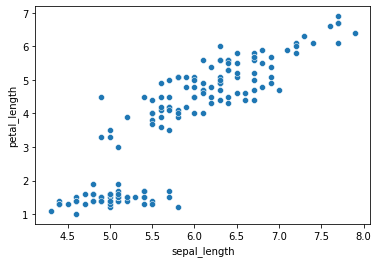

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
n = iris.sepal_width.size

In [ ]:
xbar, ybar = x.mean(), y.mean()

In [ ]:
product = []
for i in range (n) :
  product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

1.2658200000000006

In [ ]:
beta1 = cov/np.var(x)
beta1

1.8584329782548417

In [ ]:
beta0 = ybar - beta1*xbar
beta0

-7.101443369602459

In [ ]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

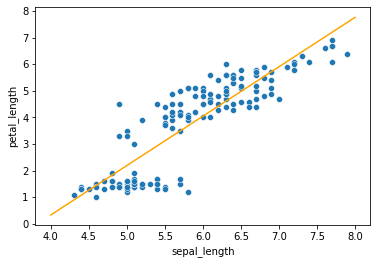

In [ ]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color = 'orange')

In [ ]:
x_i = 5.5

In [ ]:
y_i = beta0 + beta1*x_i
y_i

3.1199380107991708

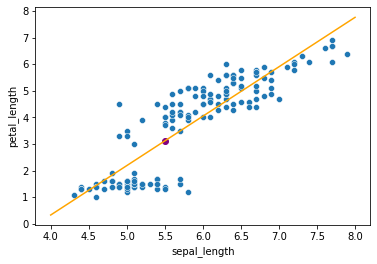

In [ ]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker = 'o', color = 'purple')

In [ ]:
cov2 = np.cov(x,y)
cov2

array([[0.68569351, 1.27431544],
       [1.27431544, 3.11627785]])

In [ ]:
beta_1 = cov2[0,1]/cov2[0,0]
beta_1

1.858432978254842

#CONTOH REGRESI (2)

In [ ]:
import numpy as np
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])

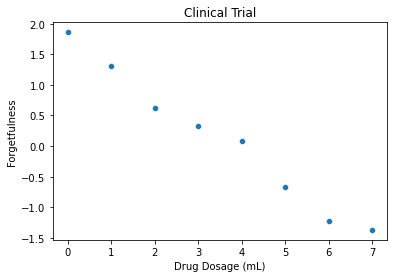

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title('Clinical Trial')
plt.xlabel('Drug Dosage (mL)')
_ = plt.ylabel('Forgetfulness')

In [ ]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

In [ ]:
cov_mat[0,1]

-2.815714285714286

In [ ]:
cov_mat[0,0]

6.0

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

-0.4692857142857143

In [ ]:
beta0 = y.mean() - beta1*x.mean()
beta0

1.76

In [ ]:
x_i = 4.5

In [ ]:
y_i = beta0 + beta1*x_i
y_i

-0.35178571428571437

In [ ]:
xline = np.linspace(0, 8, 1000)
yline = beta0 + beta1*xline

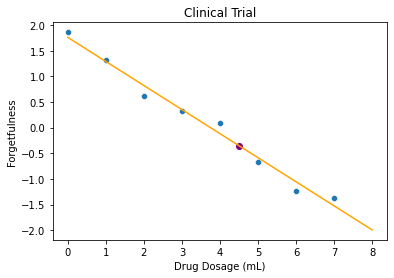

In [ ]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color = 'orange')
plt.title('Clinical Trial')
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = plt.scatter(x_i, y_i, marker = 'o', color = 'purple')